<a href="https://colab.research.google.com/github/Olivieri-Lucas/Spotify_Data_Explore/blob/main/spotify_data_explore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/Olivieri-Lucas/Spotify_Data_Explore.git

Cloning into 'Spotify_Data_Explore'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 10 (delta 2), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (10/10), 103.65 KiB | 2.88 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [ ]:
%cd /content/Spotify_Data_Explore

/content/Spotify_Data_Explore


In [ ]:
import json
import pandas as pd

# Opening and reading the JSON file
with open('StreamingHistory0.json', 'r') as file:
    data = json.load(file)

# Converting JSON data into a pandas DataFrame
df = pd.json_normalize(data)

# Displaying the first few rows of the DataFrame
print(df.head())

            endTime artistName                        trackName  msPlayed
0  2022-11-15 11:37      Sambô             Brincar de Ser Feliz     91445
1  2022-11-16 12:25      Sambô             Brincar de Ser Feliz    101149
2  2022-11-16 12:30      Sambô      Retalhos de Cetim - Ao Vivo    254000
3  2022-11-16 12:32      Sambô           Pra Ver Se Sente Falta    133050
4  2022-11-16 12:35      Sambô  Gostava Tanto de Você - Ao Vivo    174467


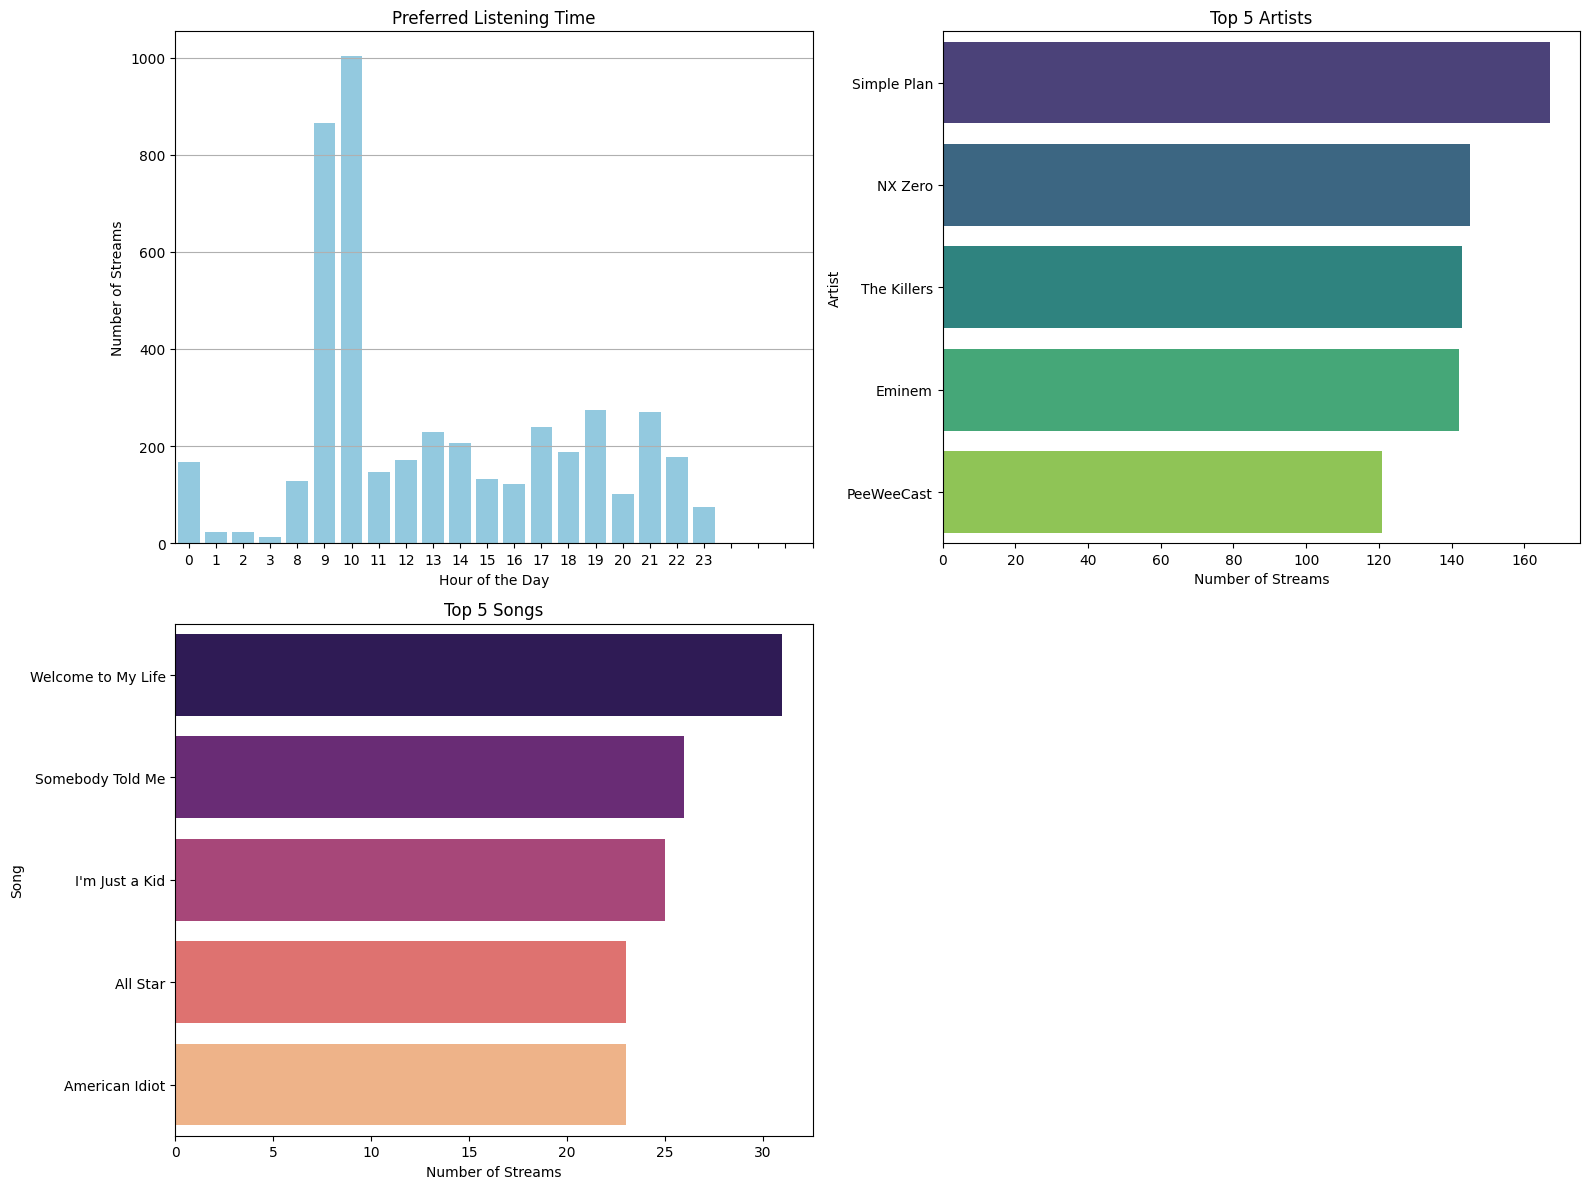

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


# Convert 'endTime' to datetime for easier analysis
df['endTime'] = pd.to_datetime(df['endTime'])

# Extracting hour from the 'endTime' for analysis of preferred listening time
df['hour'] = df['endTime'].dt.hour

# Analyzing Top Artists and Top Songs
top_artists = df['artistName'].value_counts().head(5)
top_songs = df['trackName'].value_counts().head(5)

# Preferred Listening Time Analysis
preferred_time = df['hour'].value_counts().sort_index()

# Plotting all three analyses (Preferred Listening Time, Top Artists, Top Songs) in a single frame with subplots

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plotting Preferred Listening Time
sns.barplot(ax=axes[0, 0], x=preferred_time.index, y=preferred_time.values, color='skyblue')
axes[0, 0].set_title('Preferred Listening Time')
axes[0, 0].set_xlabel('Hour of the Day')
axes[0, 0].set_ylabel('Number of Streams')
axes[0, 0].set_xticks(range(0, 24))
axes[0, 0].grid(axis='y')

# Plotting Top Artists
sns.barplot(ax=axes[0, 1], x=top_artists.values, y=top_artists.index, palette='viridis')
axes[0, 1].set_title('Top 5 Artists')
axes[0, 1].set_xlabel('Number of Streams')
axes[0, 1].set_ylabel('Artist')

# Plotting Top Songs
sns.barplot(ax=axes[1, 0], x=top_songs.values, y=top_songs.index, palette='magma')
axes[1, 0].set_title('Top 5 Songs')
axes[1, 0].set_xlabel('Number of Streams')
axes[1, 0].set_ylabel('Song')

# Empty quadrant (1,1)
axes[1, 1].axis('off')  # Turning off the 4th quadrant as we don't have a 4th plot

plt.tight_layout()
plt.show()




In [ ]:
!pip install spotipy

In [2]:
#https://developer.spotify.com/dashboard
#client_id = input("Enter your Spotify Client ID: ")
#client_secret = input("Enter your Spotify Client Secret: ")

In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

# Setting up the Spotify client credentials manager
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

# Assuming 'df' is your original DataFrame with a column 'artistName'
unique_artists = df['artistName'].unique()

# Function to fetch artist details from Spotify
def get_artist_info(artist_name):
    results = sp.search(q='artist:' + artist_name, type='artist', limit=1)
    items = results['artists']['items']
    if items:
        artist = items[0]
        artist_id = artist['id']

        # Fetching additional details
        related_artists = [a['name'] for a in sp.artist_related_artists(artist_id)['artists']]
        top_tracks = [t['name'] for t in sp.artist_top_tracks(artist_id)['tracks']]

        return {
            'artistName': artist_name,
            'spotifyID': artist_id,
            'genres': artist['genres'],
            'popularity': artist['popularity'],
            'related_artists': related_artists,
            'top_tracks': top_tracks
        }
    else:
        return None

# Fetching details for each artist
artist_data = []
for artist in unique_artists:
    info = get_artist_info(artist)
    if info:
        artist_data.append(info)

# Creating a new DataFrame with Spotify information
spotify_df = pd.DataFrame(artist_data)

# Merging the original DataFrame with the Spotify data
enriched_df = pd.merge(df, spotify_df, on='artistName', how='left')

# Now 'enriched_df' contains your original data enriched with Spotify data including images, related artists, and top tracks

In [ ]:
enriched_df.head()

,endTime,artistName,trackName,msPlayed,hour,spotifyID,genres,popularity,related_artists,top_tracks
0,2022-11-15 11:37:00,Sambô,Brincar de Ser Feliz,91445,11,5ydDSP9qSxEOlHWnpbblFB,"[j-pop, j-rock]",50.0,"[GING NANG BOYZ, Elephant Kashimashi, Chatmonc...","[できっこないを やらなくちゃ, 青春狂騒曲, 世界はそれを愛と呼ぶんだぜ, Future ..."
1,2022-11-16 12:25:00,Sambô,Brincar de Ser Feliz,101149,12,5ydDSP9qSxEOlHWnpbblFB,"[j-pop, j-rock]",50.0,"[GING NANG BOYZ, Elephant Kashimashi, Chatmonc...","[できっこないを やらなくちゃ, 青春狂騒曲, 世界はそれを愛と呼ぶんだぜ, Future ..."
2,2022-11-16 12:30:00,Sambô,Retalhos de Cetim - Ao Vivo,254000,12,5ydDSP9qSxEOlHWnpbblFB,"[j-pop, j-rock]",50.0,"[GING NANG BOYZ, Elephant Kashimashi, Chatmonc...","[できっこないを やらなくちゃ, 青春狂騒曲, 世界はそれを愛と呼ぶんだぜ, Future ..."
3,2022-11-16 12:32:00,Sambô,Pra Ver Se Sente Falta,133050,12,5ydDSP9qSxEOlHWnpbblFB,"[j-pop, j-rock]",50.0,"[GING NANG BOYZ, Elephant Kashimashi, Chatmonc...","[できっこないを やらなくちゃ, 青春狂騒曲, 世界はそれを愛と呼ぶんだぜ, Future ..."
4,2022-11-16 12:35:00,Sambô,Gostava Tanto de Você - Ao Vivo,174467,12,5ydDSP9qSxEOlHWnpbblFB,"[j-pop, j-rock]",50.0,"[GING NANG BOYZ, Elephant Kashimashi, Chatmonc...","[できっこないを やらなくちゃ, 青春狂騒曲, 世界はそれを愛と呼ぶんだぜ, Future ..."
